In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
af=pd.read_csv("aerofit_treadmill.csv")

In [ ]:
af.head()

In [ ]:
af.head()

#We have taken the details of the data set useing head() method.

# Case study 

#The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill 
#offered by the company, to provide a better recommendation of the treadmills to the new customers. 
#The team decides to investigate whether there are differences across the product with respect to customer characteristics.


In [4]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Dataframe is with 8 columns and 180 rows.

In [5]:
af.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Unique values in each Columsn are given in the above table.

In [6]:
af.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Non null values are there in the dataframe.

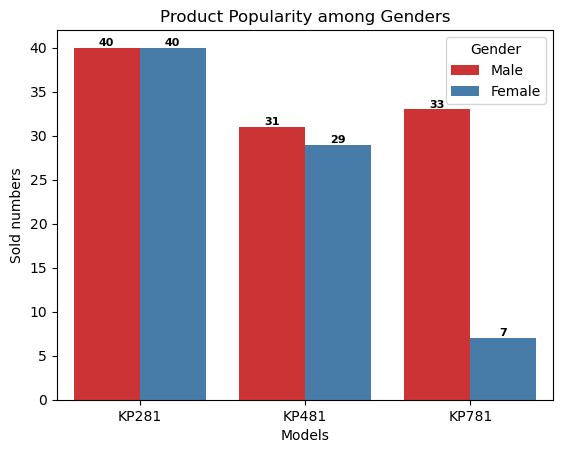

In [147]:
ax=sns.countplot(data=af,x="Product",hue="Gender",palette="Set1")
for i in ax.containers:
    ax.bar_label(i,weight="bold",size=8)
plt.xlabel("Models")
plt.ylabel("Sold numbers")
plt.title("Product Popularity among Genders")
plt.show()

Most of the customers are using KP281 , and in almost all categories male users are leading except in KP281
Users of KP781 are having more male users than female.

In [153]:
af.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


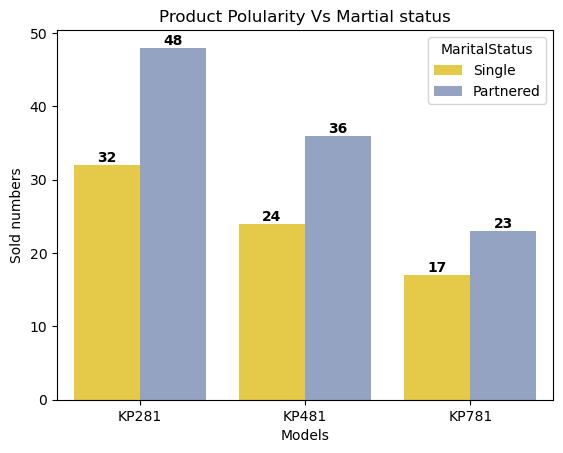

In [148]:
ay=sns.countplot(data=af,x="Product",hue="MaritalStatus",palette="Set2_r")
for i in ay.containers:
    ay.bar_label(i,weight="bold",)
plt.xlabel("Models")
plt.ylabel("Sold numbers")
plt.title("Product Polularity Vs Martial status")
plt.show()

More users are partnered in all model categories
The differenece is lowering of we move up the model, the top end model KP781 are having a a small Gap of 5 users between the single and partnered users

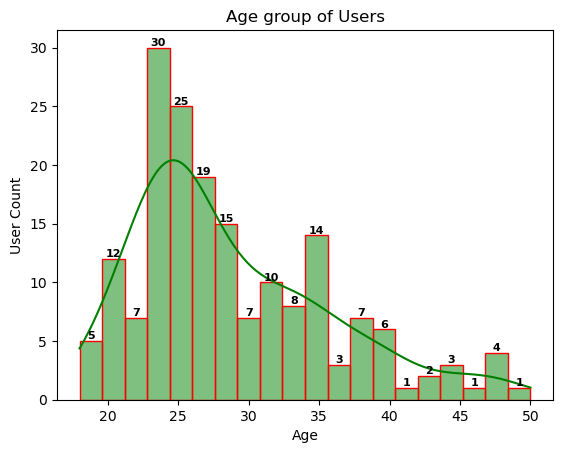

In [163]:
az=sns.histplot(af["Age"],bins=20,kde=True,color="g",edgecolor="red")
for i in az.containers:
    az.bar_label(i,weight="bold",size=8)
plt.xlabel("Age")
plt.ylabel("User Count")
plt.title("Age group of Users")
plt.show()

Most of the users are from the age group 20 to 30
Users are there till the age of 50


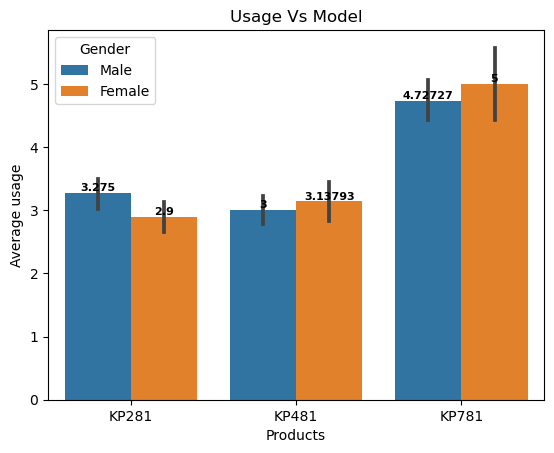

In [166]:
ab=sns.barplot(x=af["Product"],y=af["Usage"],hue=af["Gender"],estimator="mean")
for i in ab.containers:
    ab.bar_label(i,weight="bold",size=8)
plt.xlabel("Products")
plt.ylabel("Average usage")
plt.title("Usage Vs Model")
plt.show()

Average use is more among the users of KP781
Females are leading in the average usage in all other models except KP281


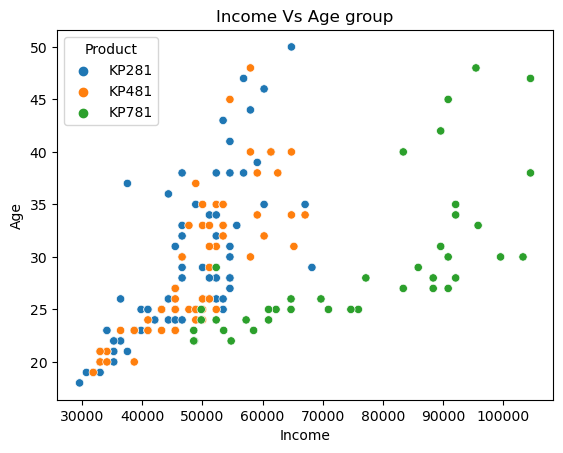

In [164]:
sns.scatterplot(data=af,x="Income",y="Age",hue="Product")
plt.title("Income Vs Age group")
plt.show()

Most of the  High income users are using the top end model KP781
All the age groups are using the entry level model KP281


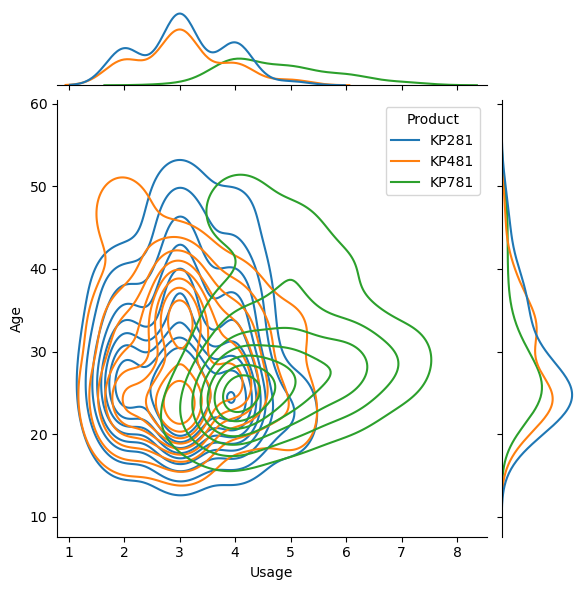

In [175]:
sns.jointplot(data=af,x="Usage",y="Age",hue="Product",kind="kde")
plt.show()

Most the users of KP781 are using the treadmill on regular basis
The average usage is less than 5 across all models and age group

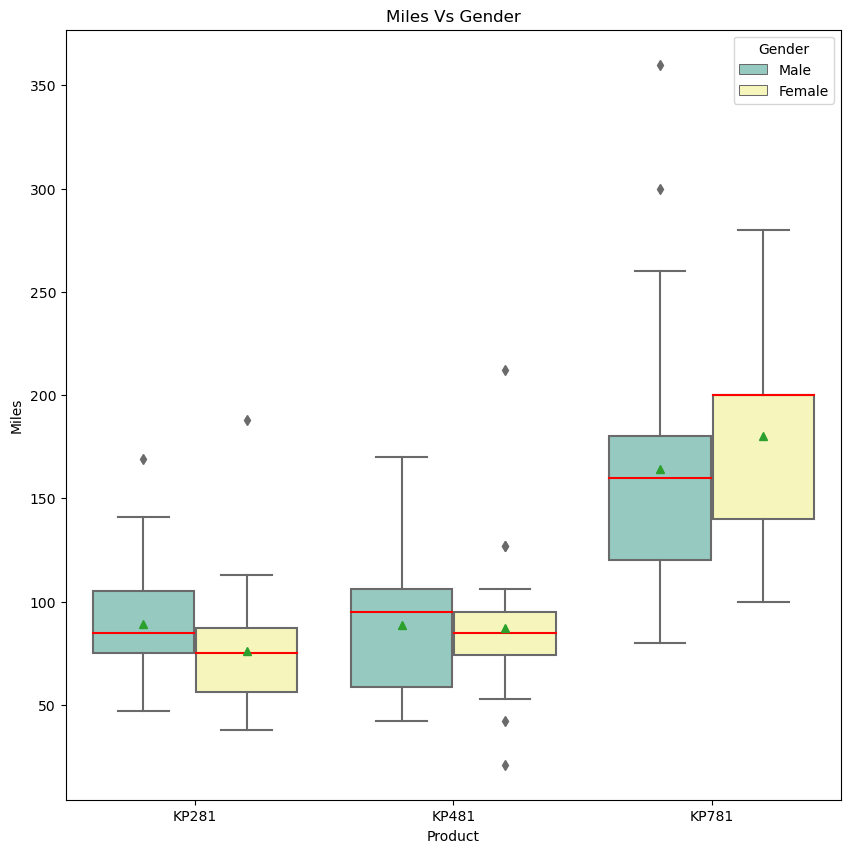

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(data=af,x="Product",y="Miles",hue="Gender",showmeans=True,palette="Set3",medianprops={'color':'red'})
plt.title("Miles Vs Gender")
plt.show()

50% of male users ofthe KP781 are using the Treadmill for covering more than 150 miles in a week
Average miles are very higher in the Top end model KP781
Average miles are very higher male users except the KP781 users


In [68]:
af_check=af[(af["Product"]=="KP781") & (af["Gender"]=="Female")]

In [69]:
af_check.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,27.000000,17.857143,5.000000,4.571429,73633.857143,180.000000
std,3.559026,1.676163,0.816497,0.786796,19009.925227,63.245553
min,23.000000,16.000000,4.000000,3.000000,52291.000000,100.000000
25%,24.500000,17.000000,4.500000,4.500000,57271.000000,140.000000
50%,26.000000,18.000000,5.000000,5.000000,69721.000000,200.000000
75%,29.000000,18.000000,5.500000,5.000000,91508.500000,200.000000
max,33.000000,21.000000,6.000000,5.000000,95866.000000,280.000000


In [84]:
age_fitness=pd.pivot_table(af,
              index="Age",
              columns="Fitness",
              values="Product",
              aggfunc="count"
              )

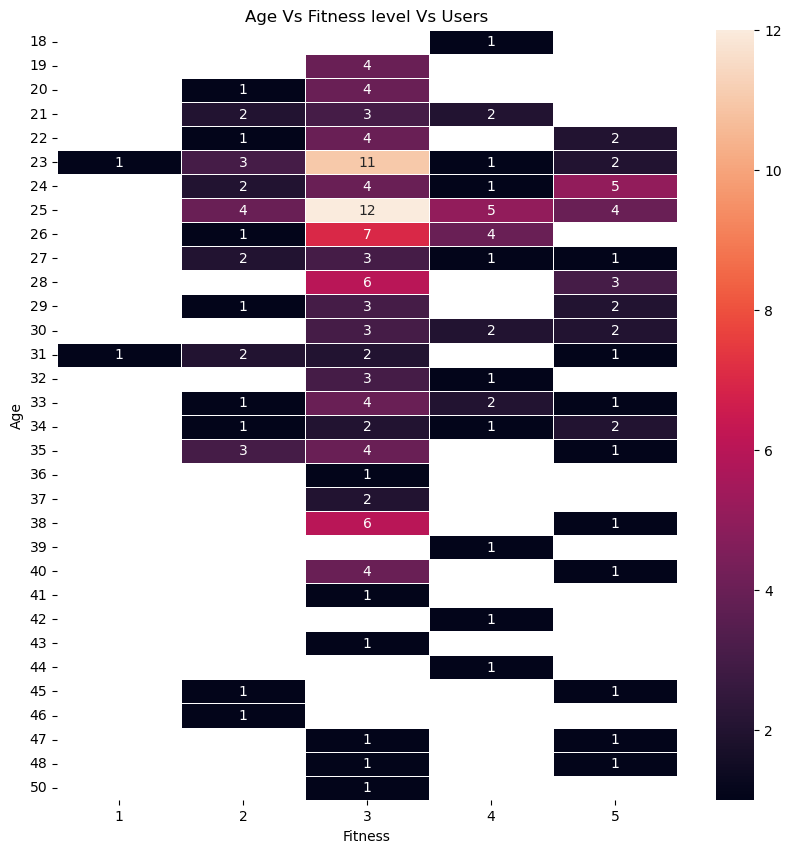

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(data=age_fitness,linewidth=.5,annot=True)
plt.yticks(rotation =0)
plt.title("Age Vs Fitness level Vs Users")
plt.show()

More users are on the categoty of fitness 5
High fitness rated users are also there in the higher age groups

In [111]:
np.round(pd.crosstab(af["Gender"],
                     af["Product"],rownames=["Gender"],colnames=["Products"],
                     margins=True,margins_name="Total",normalize=True),2)

Products,KP281,KP481,KP781,Total
Gender,,,,
Female,0.22,0.16,0.04,0.42
Male,0.22,0.17,0.18,0.58
Total,0.44,0.33,0.22,1.00


# Marginal Probability

Probablity of sale of KP281,KP481 and KP781 are 0.44,0.33 and 0.22 respectively 
Probablity of males in the total users is 0.58 and female is 0.42

# Conditional Probability(P(A/B)=P(AnB)/P(B))

Probability of finding a male user given that the machine is KP281( P(M/KP281))=0.22/0.44 is 0.50
Probability of finding a female user given that the machine is KP281( P(F/KP281))=0.22/0.44 is 0.50
Probability of finding a male user given that the machine is KP481( P(M/KP481))=0.17/0.33 is 0.515
Probability of finding a female user given that the machine is KP481( P(F/KP481))=0.16/0.33 is 0.484
Probability of finding a male user given that the machine is KP781( P(M/KP781))=0.18/0.22 is 0.818
Probability of finding a female user given that the machine is KP781( P(F/KP781))=0.04/0.22 is 0.181

Probability of finding a KP281 user given that it is a male ( P(KP281/M))=0.22/0.58 is 0.379
Probability of finding a KP281 user given that it is a Female ( P(KP281/F))=0.22/0.42 is 0.523
Probability of finding a KP281 user given that it is a male ( P(KP481/M))=0.17/0.58 is 0.293
Probability of finding a KP281 user given that it is a Female ( P(K4281/F))=0.16/0.42 is 0.38
Probability of finding a KP281 user given that it is a male ( P(KP781/M))=0.18/0.58 is 0.310
Probability of finding a KP281 user given that it is a Female ( P(KP781/F))=0.04/0.42 is 0.0952


In [126]:
np.round(pd.crosstab(af["Fitness"],
                     af["Product"],rownames=["Fitness"],colnames=["Products"],
                     margins=True,margins_name="Total",normalize=True),2)

Products,KP281,KP481,KP781,Total
Fitness,,,,
1,0.01,0.01,0.00,0.01
2,0.08,0.07,0.00,0.14
3,0.30,0.22,0.02,0.54
4,0.05,0.04,0.04,0.13
5,0.01,0.00,0.16,0.17
Total,0.44,0.33,0.22,1.00


# Marginal Probability

Probability of finding 5 rated user is 0.17
Probability of finding 4 rated user is 0.13
Probability of finding 3 rated user is 0.54
Probability of finding 2 rated user is 0.14
Probability of finding 1 rated user is 0.01

# Conditional Probability(P(A/B)=P(AnB)/P(B))

Probability of user is 2 rated given that he/she is using a KP481 P(2/KP481)=0.07/0.33=0.21
Probability of user is 5 rated given that he/she is using a KP781 P(5/KP781)=0.16/0.22=0.72

Probability of buying a KP781 if the person is 4 rated is P(KP781/4)=0.04/0.13=0.3076



In [136]:
np.round(pd.crosstab(af["Product"],[af["MaritalStatus"],af["Gender"]],
                     rownames=["Products"],colnames=["Gender","Martial_Status"],
                     margins=True,margins_name="Total",normalize=True),2)

Gender         Partnered       Single       Total
Martial_Status    Female  Male Female  Male      
Products                                         
KP281               0.15  0.12   0.07  0.11  0.44
KP481               0.08  0.12   0.08  0.06  0.33
KP781               0.02  0.11   0.02  0.08  0.22
Total               0.26  0.34   0.17  0.24  1.00

# Marginal Probability

Probability for a Treadmill buyer being partnered is 0.59
Probability for a Treadmill buyer being single is 0.31

# Conditional Probability(P(A/B)=P(AnB)/P(B))

Probability for a Treadmill buyer being partnered male is P(P/M)=0.34/0.58 is 0.58
Probability for a Treadmill buyer being single female is P(S/F)=0.17/0.42=0.404
Probability for a Treadmill buyer being single male is P(S/M)=0.24/0.58 is  0.413
Probability for a Treadmill buyer being single female is P(P/F)=0.26/0.42=0.619

Probability of a KP481 treadmill buyer being a Partnered male P(P/M/KP481) =0.12/0.515 = 0.233
Probability of a KP481 treadmill buyer being a Single Female P(S/F/KP781) =0.02/0.181 = 0.11
Probability of a KP481 treadmill buyer being a Partnered male P(P/M/KP281) =0.12/0.50 = 0.24
Probability of a KP481 treadmill buyer being a Single Female P(S/F/KP481) =0.08/0.484 = 0.165


# Business Insights

   Top fitness rated users are tend to buy top end model KP781
   If a buyer is partnered , the chance of buying the products are more
   Highincome users need to be pitched with the top end model
   Majority of the users are having a fitness level 3 and above, which can used as a pitch point for the new users
   The users are mainly from the age group of less than 30,need to pitch the high end products to the usres to sustain the users    for longer period
   High end models are at high use , need to check on issuing warranty or replacement offer after a period of time
   Aerofit should introduce more models in this segment as there are only 3, more options can attrcat more customers


Done by Marshal Harsh Mathew

In [ ]:
af["Gender"]